In [1]:
using Plots

In [17]:
include("LiPoSID.jl")
using QuantumOptics
basis = NLevelBasis(2)
using LinearAlgebra

In [3]:
function Kraus(ρ₀, E)
    ρ = sum(K * ρ₀ * K' for K in E)
    return ρ
end

Kraus (generic function with 1 method)

In [23]:
data_dir = "DATA/"

γ_list = [ "0.079477",  "0.25133", "0.79477", "2.5133", "7.9477", "25.133",  "79.477", "251.33"]
γᵢ = γ_list[1]

γᵢ = string(γᵢ)

ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵢ)
ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵢ)
ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵢ)
ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵢ)

lᵉ = length(ρᵉ); lᵍ = length(ρᵍ); lˣ = length(ρˣ); lʸ = length(ρʸ)
lᵐᵃˣ = min(lᵉ, lᵍ,  lˣ, lʸ)  #choose time limit by shortest series

tᵉᶠ = convert.(Float64, tᵉ); tᵍᶠ = convert.(Float64, tᵍ); 
tˣᶠ = convert.(Float64, tˣ); tʸᶠ = convert.(Float64, tʸ); 

Δt = tˣᶠ[2] - tˣᶠ[1]

Aᴰᴹᴰ⁻ˢᴮ = LiPoSID.direct_DMD_01XY_b4_A([ρᵉ, ρᵍ, ρˣ, ρʸ])
eigen(Aᴰᴹᴰ⁻ˢᴮ)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
 0.8755847745179045 - 0.4814149270432724im
 0.8755847745179045 + 0.4814149270432724im
 0.9984117442527495 + 0.0im
 0.9999999999999992 + 0.0im
vectors:
4×4 Matrix{ComplexF64}:
  0.00111973-0.70707im      …  -6.78785e-7+0.0im  4.29302e-7+0.0im
    0.707143-0.0im               2.0508e-8+0.0im  1.22163e-8+0.0im
 -1.43186e-5+1.07853e-5im              1.0+0.0im    0.707146+0.0im
 3.60221e-16+4.07917e-16im     6.46594e-13+0.0im    0.707068+0.0im

In [22]:
ωᶠ = 25.126

Hᴸᴹᴱ = [ ωᶠ        0
         0        0   ]

γᶠ = parse(Float64, γᵢ)

Aᴸᴹᴱ = [ 0    √γᶠ
         0     0. + 0im  ]

tᵉᶠ = convert.(Float64, tᵉ); tᵍᶠ = convert.(Float64, tᵍ); 
tˣᶠ = convert.(Float64, tˣ); tʸᶠ = convert.(Float64, tʸ); 

t = tˣᶠ
Δt = t[2] - t[1] #0.02

ρᵉᴸᴹᴱ = LiPoSID.Lindblad_time_evolution(basis, ρᵉ[1], tᵉᶠ, Hᴸᴹᴱ, [Aᴸᴹᴱ])
ρᵍᴸᴹᴱ = LiPoSID.Lindblad_time_evolution(basis, ρᵍ[1], tᵍᶠ, Hᴸᴹᴱ, [Aᴸᴹᴱ])
ρˣᴸᴹᴱ = LiPoSID.Lindblad_time_evolution(basis, ρˣ[1], tˣᶠ, Hᴸᴹᴱ, [Aᴸᴹᴱ])
ρʸᴸᴹᴱ = LiPoSID.Lindblad_time_evolution(basis, ρʸ[1], tʸᶠ, Hᴸᴹᴱ, [Aᴸᴹᴱ])

Aᴰᴹᴰ⁻ᴸᴹᴱ = LiPoSID.direct_DMD_01XY_b4_A([ρᵉᴸᴹᴱ, ρᵍᴸᴹᴱ, ρˣᴸᴹᴱ, ρʸᴸᴹᴱ])
eigen(Aᴰᴹᴰ⁻ᴸᴹᴱ)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
 0.8756752742337365 - 0.48125287318117876im
 0.8756752742337365 + 0.48125287318117876im
 0.9984117225648561 + 0.0im
 0.9999999999999982 + 0.0im
vectors:
4×4 Matrix{ComplexF64}:
  -1.4248e-12+0.707107im     …  -1.02968e-10+0.0im
    -0.707107-0.0im              6.57337e-10+0.0im
 -1.55904e-13+5.24599e-14im         0.707107+0.0im
  6.37162e-17+2.71344e-16im         0.707107+0.0im

In [6]:
function bloch4(ρ)

    b = convert.(Float64, [ ρ[1,2] + ρ[2,1],
                           (ρ[1,2] - ρ[2,1])*im,    #ρ[2,1] - ρ[1,2] ?
                            ρ[1,1] - ρ[2,2],
                               1                 ]) #ρ[1,1] + ρ[2,2]  

end

function dm_b4(b) 

    ρ = [ 1+b[3]         b[1]-im*b[2]
          b[1]+im*b[2]   1-b[3]       ]/2

end

function propagate_DMD_b4(A, ρ₀, lᵐᵃˣ)

    ρ = [ρ₀]

    for i in 2:lᵐᵃˣ
        push!(ρ, dm_b4( A * bloch4(ρ[end])))
    end

    return ρ

end

ρᵍᴰᴹᴰ⁻ˢᴮ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ˢᴮ, ρᵍ[1], length(ρᵍ))
ρᵉᴰᴹᴰ⁻ˢᴮ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ˢᴮ, ρᵉ[1], length(ρᵉ))
ρˣᴰᴹᴰ⁻ˢᴮ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ˢᴮ, ρˣ[1], length(ρˣ))
ρʸᴰᴹᴰ⁻ˢᴮ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ˢᴮ, ρʸ[1], length(ρʸ));

ρᵍᴰᴹᴰ⁻ᴸᴹᴱ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρᵍᴸᴹᴱ[1], length(ρᵍᴸᴹᴱ))
ρᵉᴰᴹᴰ⁻ᴸᴹᴱ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρᵉᴸᴹᴱ[1], length(ρᵉᴸᴹᴱ))
ρˣᴰᴹᴰ⁻ᴸᴹᴱ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρˣᴸᴹᴱ[1], length(ρˣᴸᴹᴱ))
ρʸᴰᴹᴰ⁻ᴸᴹᴱ  = propagate_DMD_b4(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρʸᴸᴹᴱ[1], length(ρʸᴸᴹᴱ));

In [7]:
min(minimum(LiPoSID.fidelity_series(basis, ρᵍᴰᴹᴰ⁻ˢᴮ, ρᵍ)),
    minimum(LiPoSID.fidelity_series(basis, ρᵉᴰᴹᴰ⁻ˢᴮ, ρᵉ)),
    minimum(LiPoSID.fidelity_series(basis, ρˣᴰᴹᴰ⁻ˢᴮ, ρˣ)),
    minimum(LiPoSID.fidelity_series(basis, ρʸᴰᴹᴰ⁻ˢᴮ, ρʸ)))

0.9999257646337445

In [8]:
min(minimum(LiPoSID.fidelity_series(basis, ρᵍᴰᴹᴰ⁻ᴸᴹᴱ, ρᵍᴸᴹᴱ)),
    minimum(LiPoSID.fidelity_series(basis, ρᵉᴰᴹᴰ⁻ᴸᴹᴱ, ρᵉᴸᴹᴱ)),
    minimum(LiPoSID.fidelity_series(basis, ρˣᴰᴹᴰ⁻ᴸᴹᴱ, ρˣᴸᴹᴱ)),
    minimum(LiPoSID.fidelity_series(basis, ρʸᴰᴹᴰ⁻ᴸᴹᴱ, ρʸᴸᴹᴱ)))

0.9999999999995641

In [25]:
function DMD_step(A, ρ₀)
    dm_b4(A * bloch4(ρ₀))
end

ρᵍ₀ = [1. 0]' * [1 0]
ρᵉ₀ = [0. 1]' * [0 1]
ρˣ₀ = [1  1]' * [1 1]/2
ρʸ₀ = [1 -im]' * [1 -im]/2

ρᵍ₁ᴸᴹᴱ = DMD_step(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρᵍ₀)
ρᵉ₁ᴸᴹᴱ = DMD_step(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρᵉ₀)
ρˣ₁ᴸᴹᴱ = DMD_step(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρˣ₀)
ρʸ₁ᴸᴹᴱ = DMD_step(Aᴰᴹᴰ⁻ᴸᴹᴱ, ρʸ₀)

ρᵍ₁ˢᴮ = DMD_step(Aᴰᴹᴰ⁻ˢᴮ, ρᵍ₀)
ρᵉ₁ˢᴮ = DMD_step(Aᴰᴹᴰ⁻ˢᴮ, ρᵉ₀)
ρˣ₁ˢᴮ = DMD_step(Aᴰᴹᴰ⁻ˢᴮ, ρˣ₀)
ρʸ₁ˢᴮ = DMD_step(Aᴰᴹᴰ⁻ˢᴮ, ρʸ₀)

Eᴰᴹᴰ⁻ᴸᴹᴱ, dᴸᴹᴱ = LiPoSID.QPT(ρᵍ₁ᴸᴹᴱ, ρᵉ₁ᴸᴹᴱ, ρˣ₁ᴸᴹᴱ, ρʸ₁ᴸᴹᴱ)
Eᴰᴹᴰ⁻ˢᴮ, dˢᴮ = LiPoSID.QPT(ρᵍ₁ˢᴮ, ρᵉ₁ˢᴮ, ρˣ₁ˢᴮ, ρʸ₁ˢᴮ)

println(dᴸᴹᴱ)
println(dˢᴮ) #evolution is slightly unphysical

Eᴰᴹᴰ⁻ˢᴮ[1]


[1.3510560802961983e-11, 5.222046059004474e-8, 0.0007941387039318715, 0.9992058090620962]
[-0.00015396989514809142, 5.546387349598866e-7, 0.0009480763218224094, 0.9992053389345906]


2×2 Matrix{ComplexF64}:
 0.000720966-0.000185211im    4.66143e-6-3.83661e-6im
 -5.55556e-6+1.18023e-5im   -0.000721577-0.000185211im

In [26]:
Eᴰᴹᴰ⁻ˢᴮ[2]

2×2 Matrix{ComplexF64}:
 -6.38156e-5+4.72254e-5im   0.0403829-0.000748748im
   0.0162555+0.000748748im  7.8821e-5-1.07291e-5im

In [27]:
Eᴰᴹᴰ⁻ˢᴮ[3]

2×2 Matrix{ComplexF64}:
   0.968602-0.248616im    -2.52534e-6-1.65337e-6im
 2.52038e-6-1.96946e-6im     0.967782+0.248616im

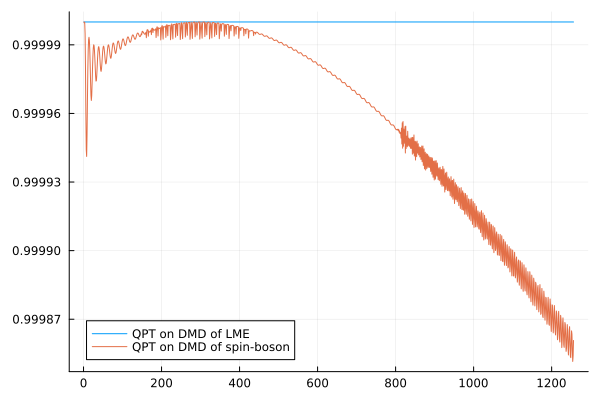

In [60]:
ρᵍ₀ = [1. 0]' * [1 0]
ρᵉ₀ = [0. 1]' * [0 1]
ρˣ₀ = [1  1]' * [1 1]/2
ρʸ₀ = [1 -im]' * [1 -im]/2

function fidelity(ρ₁, ρ₂)
    abs((tr(sqrt(sqrt(ρ₁)*ρ₂*sqrt(ρ₁))))^2)
end

fᴸᴹᴱ = []
fˢᴮ = []

for n in 1:length(ρᵍ)
#n = length(ρᵍ)
    Eᴰᴹᴰ⁻ᴸᴹᴱ = LiPoSID.QPT(ρᵍᴰᴹᴰ⁻ᴸᴹᴱ[n], ρᵉᴰᴹᴰ⁻ᴸᴹᴱ[n], ρˣᴰᴹᴰ⁻ᴸᴹᴱ[n], ρʸᴰᴹᴰ⁻ᴸᴹᴱ[n])
    Eᴰᴹᴰ⁻ˢᴮ = LiPoSID.QPT(ρᵍᴰᴹᴰ⁻ˢᴮ[n], ρᵉᴰᴹᴰ⁻ˢᴮ[n], ρˣᴰᴹᴰ⁻ˢᴮ[n], ρʸᴰᴹᴰ⁻ˢᴮ[n])

    push!(fᴸᴹᴱ, min(fidelity(Kraus(ρᵍ₀, Eᴰᴹᴰ⁻ᴸᴹᴱ), ρᵍᴸᴹᴱ[n]),
            fidelity(Kraus(ρᵉ₀, Eᴰᴹᴰ⁻ᴸᴹᴱ), ρᵉᴸᴹᴱ[n]),
            fidelity(Kraus(ρˣ₀, Eᴰᴹᴰ⁻ᴸᴹᴱ), ρˣᴸᴹᴱ[n]),
            fidelity(Kraus(ρʸ₀, Eᴰᴹᴰ⁻ᴸᴹᴱ), ρʸᴸᴹᴱ[n])))
    
    push!(fˢᴮ, min(fidelity(Kraus(ρᵍ₀, Eᴰᴹᴰ⁻ˢᴮ), ρᵍ[n]),
            fidelity(Kraus(ρᵉ₀, Eᴰᴹᴰ⁻ˢᴮ), ρᵉ[n]),
            fidelity(Kraus(ρˣ₀, Eᴰᴹᴰ⁻ˢᴮ), ρˣ[n]),
            fidelity(Kraus(ρʸ₀, Eᴰᴹᴰ⁻ˢᴮ), ρʸ[n])))
end

plot(fᴸᴹᴱ, label = "QPT on DMD of LME")
plot!(fˢᴮ, label = "QPT on DMD of spin-boson")


In [63]:
for i in 1:length(ρᵍ)
    @assert ishermitian(ρˣᴸᴹᴱ[i])
    @assert ishermitian(ρˣ[i])
    @assert ishermitian(ρˣᴰᴹᴰ⁻ᴸᴹᴱ[i])
    @assert ishermitian(ρˣᴰᴹᴰ⁻ˢᴮ[i])

    @assert tr(ρˣᴸᴹᴱ[i]) ≈ 1
    @assert tr(ρˣ[i]) ≈ 1
    @assert tr(ρˣᴰᴹᴰ⁻ᴸᴹᴱ[i]) ≈ 1
    @assert tr(ρˣᴰᴹᴰ⁻ˢᴮ[i]) ≈ 1

end